In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
plt.rc('axes', axisbelow=True)
plt.rcParams.update({'figure.autolayout': True})

metric_limits = {
    'mae': [0,10],
    'rmse': [0,10],
    'pcc': [0,1],
    'r2': [0,1]
}
metric_symbols = {
    'mae': 'mae',
    'rmse': 'rmse',
    'pcc': 'pcc',
    'r2': r'$r^2$',
}

model_names = {
    'baseline_e': 'OGT',
    'only_backbone': 'SEQ',
    '1-graph': 'DYN',
}

colors = {
    'baseline_e': '#F70DFF',
    'only_backbone': '#2877B4',
    '1-graph': '#F77800',
}

In [2]:
save = True

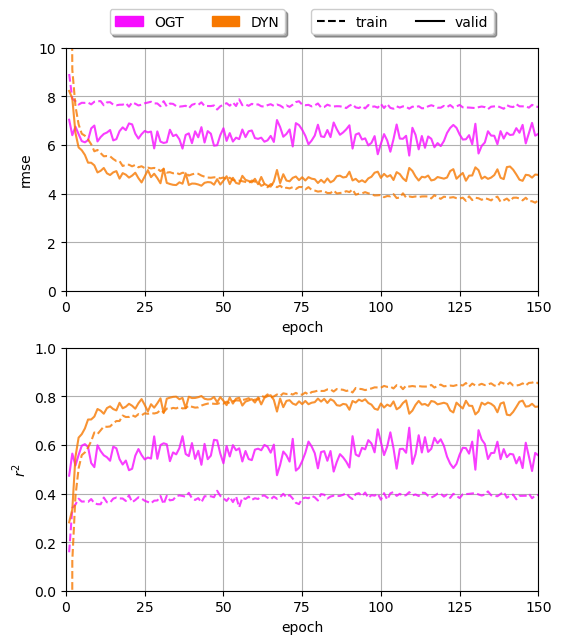

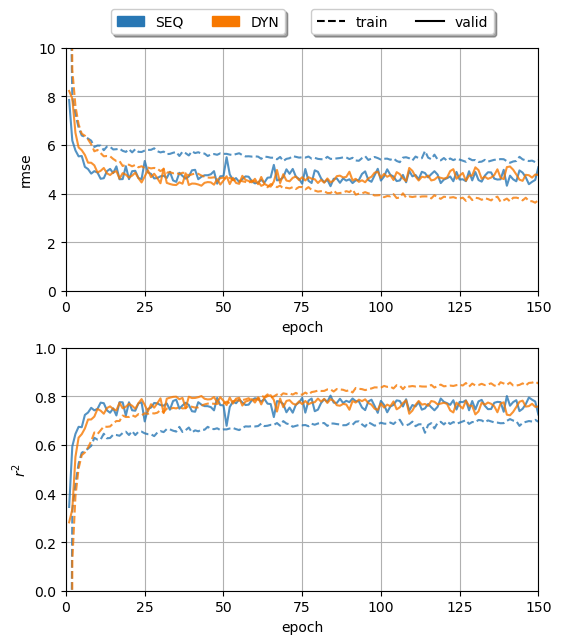

In [6]:
for pair_idx, model_pair in enumerate([[0,2], [1,2]]):

    fig, ax = plt.subplots(
        2, 1, sharex=True, sharey=False, figsize=(5.5,6), layout='constrained'
    )
    ax = ax.flatten()
    # fig.suptitle()

    for i, metric in enumerate(['rmse', 'r2']):
        df = pd.read_csv(f'model_performance-{metric}.csv')

        for model_idx, model in enumerate(model_names):
            if model_idx not in model_pair:
                continue

            c = colors[model]
            alpha = 0.8
            
            ax[i].plot(
                df['epoch'], df[f'{model} - train.{metric}'], '--',
                c=c, alpha=alpha,
                # linewidth=1,
                # label=f'{model[5:]}'
            )
            ax[i].plot(
                df['epoch'], df[f'{model} - valid.{metric}'], '-',
                c=c, alpha=alpha,
                # linewidth=1,
                # label=f'{model[5:]}: valid'
            )

        ax[i].set_xlabel('epoch')
        ax[i].set_ylabel(metric_symbols[metric])
        ax[i].set_xticks(
            np.arange(0,df['epoch'].max()+1,25),
            labels=np.arange(0,df['epoch'].max()+1,25)
        )
        ax[i].tick_params(labelbottom=True)

        ax[i].set_xlim(0, df['epoch'].max())
        ax[i].set_ylim(metric_limits[metric])

        ax[i].grid()

    handles = []
    for model_idx, model in enumerate(model_names):
        if model_idx not in model_pair:
            continue

        c = c = colors[model]
        label = f'{model_names[model]}'

        handles.append(
            mpatches.Patch(color=c, label=label)
        )
    fig.legend(
        handles=handles, bbox_to_anchor=(0.52,1.06), #loc='outside upper left',
        ncols=2, fancybox=True, shadow=True
    )
    handles = [
        mlines.Line2D([], [], color='black', linestyle='--', label='train'),
        mlines.Line2D([], [], color='black', linestyle='-', label='valid')
    ]
    fig.legend(
        handles=handles, bbox_to_anchor=(0.9,1.06), #loc='outside upper right',
        ncols=2, fancybox=True, shadow=True
    )

    if save:
        plt.savefig(f'metrics{pair_idx}.png', dpi=300, bbox_inches=Bbox([[0,0],[5.5,6.4]]))
    plt.show()
    plt.close()